In [13]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from collections import defaultdict
import random
def parseData(fname):
    for l in open(fname):
        yield eval(l)

In [14]:
rent = []
for l in open('renttherunway_final_data.json'):
    try: rent.append(eval(l))
    except: continue
rent = pd.DataFrame(rent)
def convert_weight(strin):
    if isinstance(strin, str):
        return float(strin.strip('lbs'))
    else:
        return strin
rent.weight = rent.weight.apply(convert_weight).fillna(137)
rent.rating = rent.rating.astype(float)
rent['body type'] = rent['body type'].fillna('other')
rent['bust size'] = rent['bust size'].fillna('other')
rent['rented for'] = rent['rented for'].fillna('other')
def convert_height(strin):
    if isinstance(strin, str):
        fet, inc = strin.split()
        fet = float(fet.strip("'").strip('"'))
        inc = float(inc.strip("'").strip('"'))
        return fet * 0.3048 + inc * 0.0254
    return np.NaN
rent.height = rent.height.apply(convert_height).fillna(1.6589)
rent['size'] = rent['size'].astype(float)
def convert_age(xx):
    if isinstance(xx, str):
        return float(xx)
    else:
        return xx
rent.age = rent.age.apply(convert_age).fillna(34)

In [16]:
rent.to_csv('clean.csv', index=False, encoding="utf8")

UnicodeEncodeError: 'utf-8' codec can't encode characters in position 486-487: surrogates not allowed

In [7]:
rent.dtypes

fit                object
user_id            object
bust size          object
item_id            object
weight            float64
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height            float64
size              float64
age               float64
review_date        object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa55d666250>,
      dtype=object)

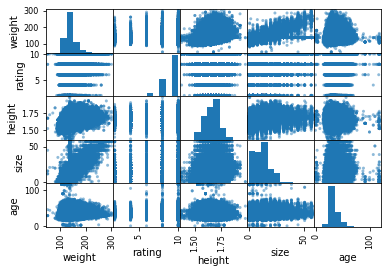

In [10]:
pd.plotting.scatter_matrix(rent[['weight', 'rating', 'height', 'size', 'age']])


In [11]:
rent

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,1.7272,14.0,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,1.6764,12.0,36.0,"June 18, 2013"
2,fit,360448,other,1063761,137.0,10.0,party,This hugged in all the right places! It was a ...,other,It was a great time to celebrate the (almost) ...,sheath,1.6256,4.0,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,1.6510,8.0,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,1.7526,12.0,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192457,fit,66386,34dd,2252812,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,1.7526,8.0,42.0,"May 18, 2016"
192458,fit,118398,32c,682043,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,1.5494,4.0,29.0,"September 30, 2016"
192459,fit,47002,36a,683251,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,1.7272,8.0,31.0,"March 4, 2016"
192460,fit,961120,36c,126335,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,1.6764,16.0,31.0,"November 25, 2015"
